In [1]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import csv
from dds_utils import get_best_configuration

In [2]:
# calculateSensitivity definition
def calcSensitivity(bw, delta, video, budget, segments):
    sensitivity = []
    for i in range(0,segments):
        _,_,_,_,f1_high,_ = get_best_configuration(budget*bw+delta, f"./data-set/{video}/profile/profile-{i}.csv")
        _,_,_,_,f1_low,_ = get_best_configuration(budget*bw-delta, f"./data-set/{video}/profile/profile-{i}.csv")
        _,_,_,_,f1_curr,_ = get_best_configuration(budget*bw, f"./data-set/{video}/profile/profile-{i}.csv")
        sens = (f1_high - f1_low)
#         sens = f1_curr - f1_low
#         sens = f1_high - f1_curr
        sensitivity.append(sens)
    return sensitivity

In [5]:
def plotSensitivity(bw_list, delta, new_data=None):
    row = 5
    col = 2
    sensitivities = []
    if new_data == "new":
        dataset = ["boston", "highway_3", "i40W", "india", "aberdeen", "tilton", "highway_4", "highway_5"]
    else:
        dataset = ["highway", "jakarta", "roppongi", "coldwater", "jakarta-uav", "timesquare", "hochiminh", "lagrange", "uav-1", "i40W"]
        dataset = ["hochiminh", "miami", "roppongi", "timesquare"]
#     # new dataset
    for video in dataset:
        sensitivity_per_app = []
        for bw in bw_list:
            sensitivities_temp = calcSensitivity(bw, delta, video, 0.45, 100)
            sensitivity_per_app.append(sensitivities_temp)
        sensitivities.append(sensitivity_per_app)
    f, ax = plt.subplots(row, col, figsize=(16,6*row), dpi=80)
#     print(sensitivities)
#     return
    for iterator in range(len(dataset)):
        ijk = 0
        for sensitivity in sensitivities[iterator]:
            posX = iterator%2
            posY = iterator//2
            ax[posY, posX].set_title(dataset[iterator])
            ax[posY, posX].set_xlabel('Time')
            ax[posY, posX].set_ylabel('Sensitivity')
            ax[posY, posX].plot([j for j in range(0,100)], sensitivity, 'o-', label=str(bw_list[ijk]) + " kbps")
            ijk += 1
#                 ax[posY, posX].vlines(160, 0, 1.0, linestyles="dashed", color="black")
#                 ax[posY, posX].vlines(200, 0, 1.0, linestyles="dashed", color="black")
#                 ax[posY, posX].vlines(290, 0, 1.0, linestyles="dashed", color="black")
#             iterator += 1
            ax[posY, posX].legend()
#     f.tight_layout()
    plt.show()
    return sensitivities

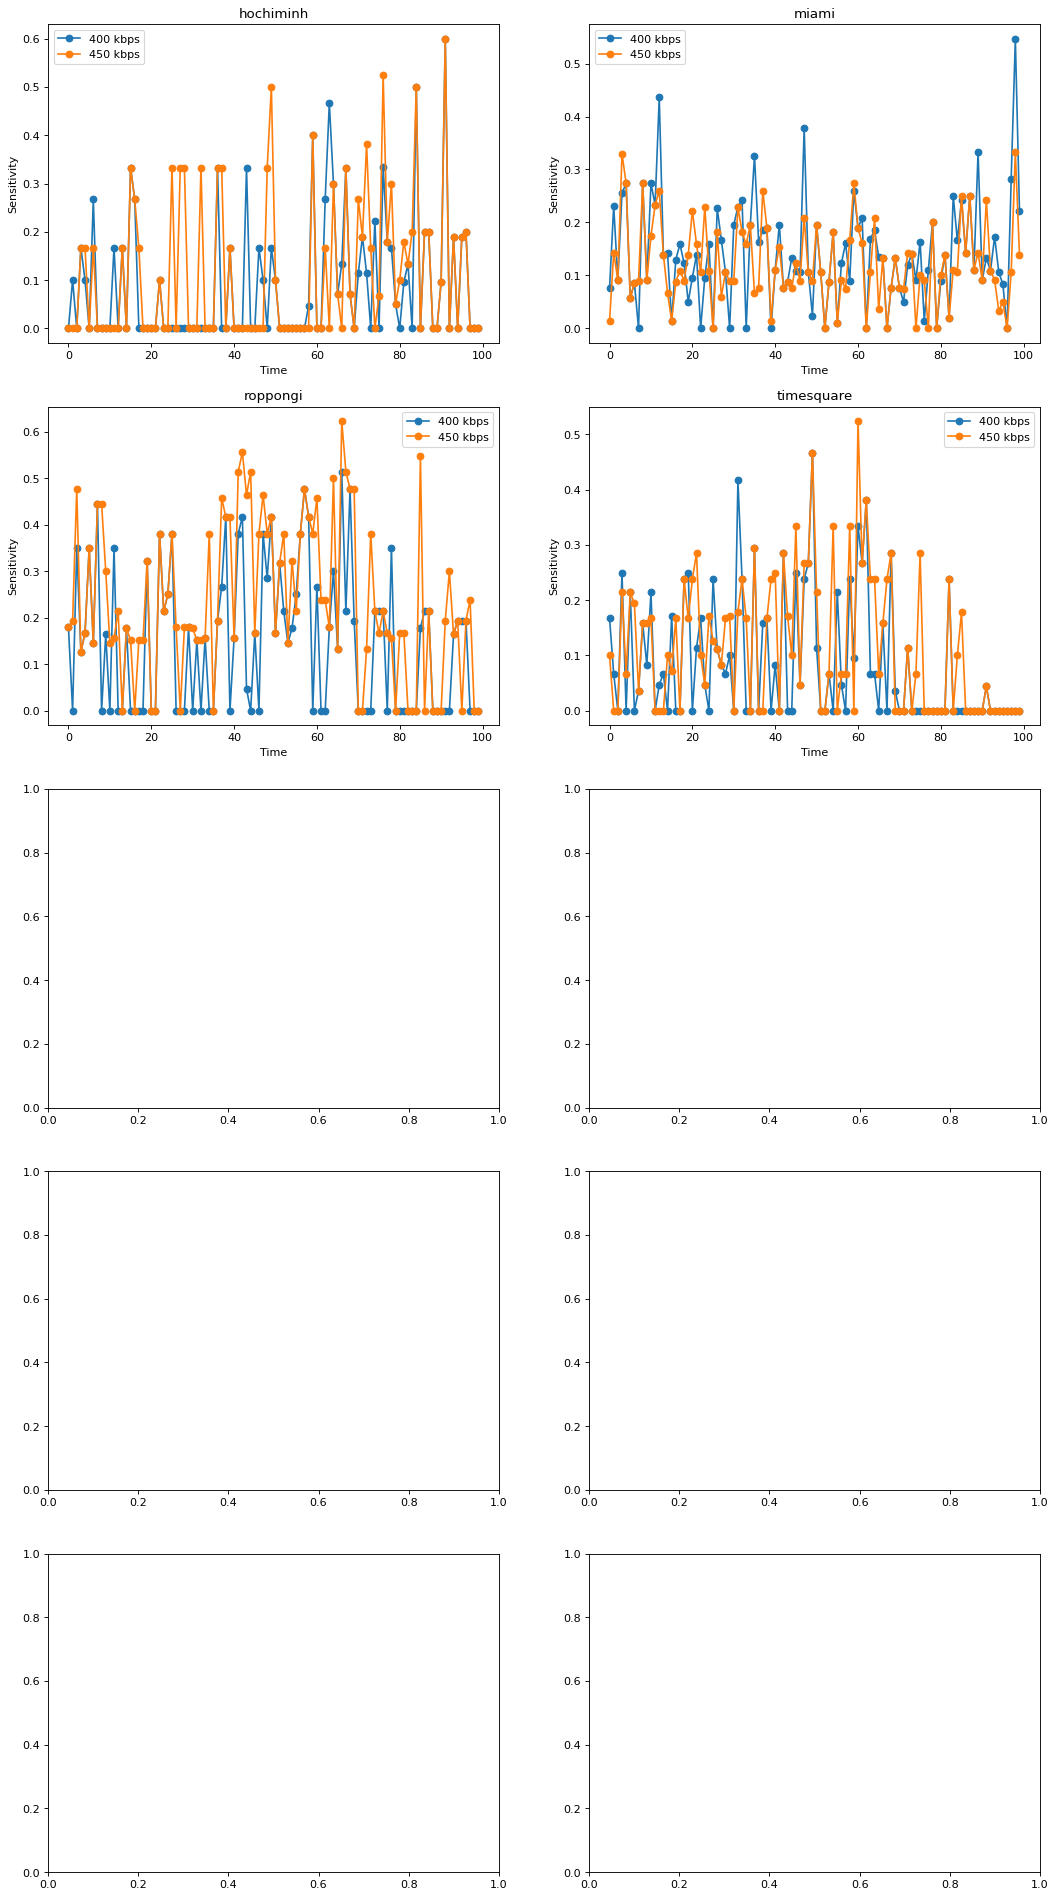

In [6]:
sensd = plotSensitivity([400, 450], 50)

In [7]:
pos = 0
hochiminh = sensd[0][pos]
miami = sensd[1][pos]
roppongi = sensd[2][pos]
timesquare = sensd[3][pos]
# coldwater = sensd[3][pos]

In [6]:
india[18] - aberdeen[44]

-0.05499999999999999

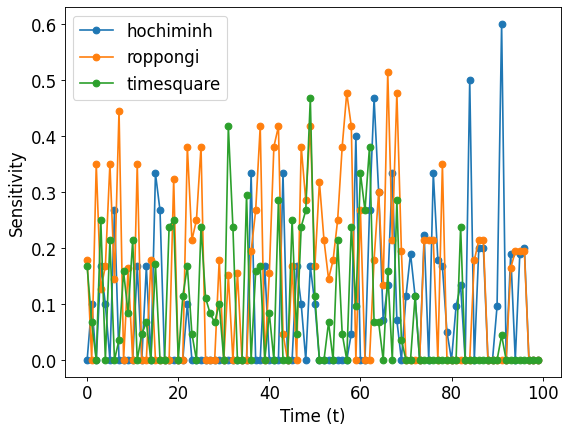

In [10]:
plt.figure(figsize=(8,6), dpi=80)

plt.xlabel('Time (t)')
plt.ylabel('Sensitivity')
plt.rcParams.update({'font.size': 15})
x_axis = [i for i in range(0,50*2,1)]

# jakarta_line = plt.plot(x_axis, highway,
# 'o-',
# label = 'highway',)
# aberdeen_line = plt.plot(x_axis, aberdeen,
# 'o-',
# label = 'Aberdeen',)
hochiminh_line = plt.plot(x_axis, hochiminh[0:100],
'o-',
label = 'hochiminh',)
# miami_line = plt.plot(x_axis, miami[0:100],
# 'o-',
# label = 'miami',)
roppongi_line = plt.plot(x_axis, roppongi[0:100],
'o-',
label = 'roppongi',)
timesquare_line = plt.plot(x_axis, timesquare[0:100],
'o-',
label = 'timesquare',)
# plt.vlines(18, 0.25, 0.35, "k", "dashed") # India
# plt.vlines(44, 0.5, 0.65, "k", "dashed") # Aberdeen
# indPos = 10
# abPos = 21
# plt.hlines(india[indPos], 0, indPos, "k", "dashed")
# plt.hlines(aberdeen[abPos], 0, abPos, "k", "dashed")



# y-axis percentage
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ticklabel_format(style='plain', axis='x', )

plt.legend()

In [45]:
# Validation
decisions = [0 if i < 5 else 1 for i in range(12)]
indiaFrame = [0, 3, 7, 10, 13, 16, 23, 30, 36, 43, 50, 57, 64]
aberdeenFrame = [0, 7, 14, 21, 28, 36, 44, 46, 48, 50, 52, 54, 56]
mistake = 0
for decision in enumerate(decisions):
    if aberdeen[aberdeenFrame[decision[0]]] > india[indiaFrame[decision[0]]] and decision[1] == 1:
        mistake +=1
    elif aberdeen[aberdeenFrame[decision[0]]] < india[indiaFrame[decision[0]]] and decision[1] == 0:
        mistake += 1
mistake

0

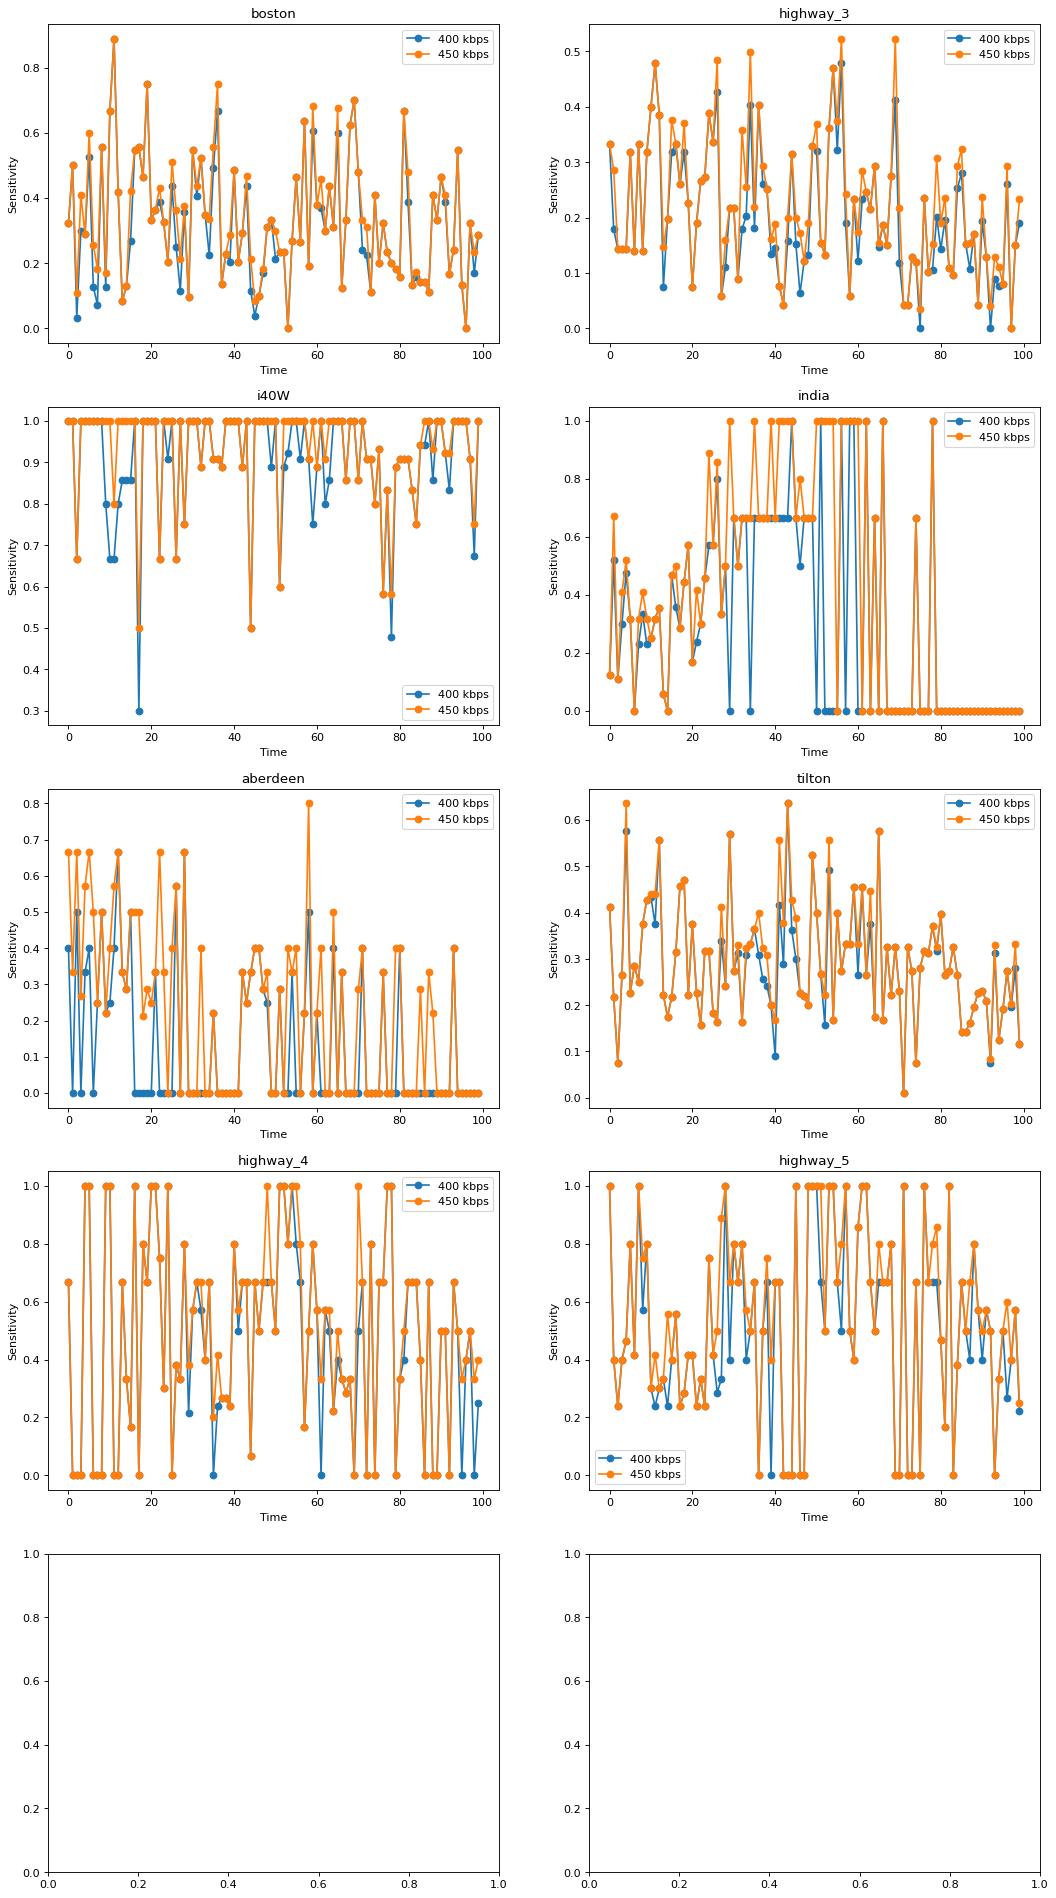

In [11]:
sensd = plotSensitivity([300, 450], 150, "old")

In [12]:
pos = 1
india = sensd[3][0]
i40W = sensd[2][pos]
aberdeen = sensd[4][1]
highway_4 = sensd[-2][pos]
# coldwater = sensd[3][pos]

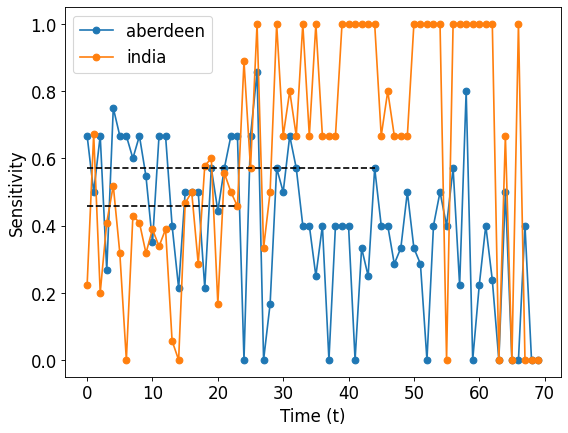

In [31]:
plt.figure(figsize=(8,6), dpi=80)

plt.xlabel('Time (t)')
plt.ylabel('Sensitivity')
plt.rcParams.update({'font.size': 15})
x_axis = [i for i in range(0,35*2,1)]

# jakarta_line = plt.plot(x_axis, highway,
# 'o-',
# label = 'highway',)
# aberdeen_line = plt.plot(x_axis, aberdeen,
# 'o-',
# label = 'Aberdeen',)
i40W_line = plt.plot(x_axis, aberdeen[0:70],
'o-',
label = 'aberdeen',)
india_line = plt.plot(x_axis, india[0:70],
'o-',
label = 'india',)
indPos = 23
abPos = 44
plt.hlines(india[indPos], 0, indPos, "k", "dashed")
plt.hlines(aberdeen[abPos], 0, abPos, "k", "dashed")


# y-axis percentage
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ticklabel_format(style='plain', axis='x', )

plt.legend()

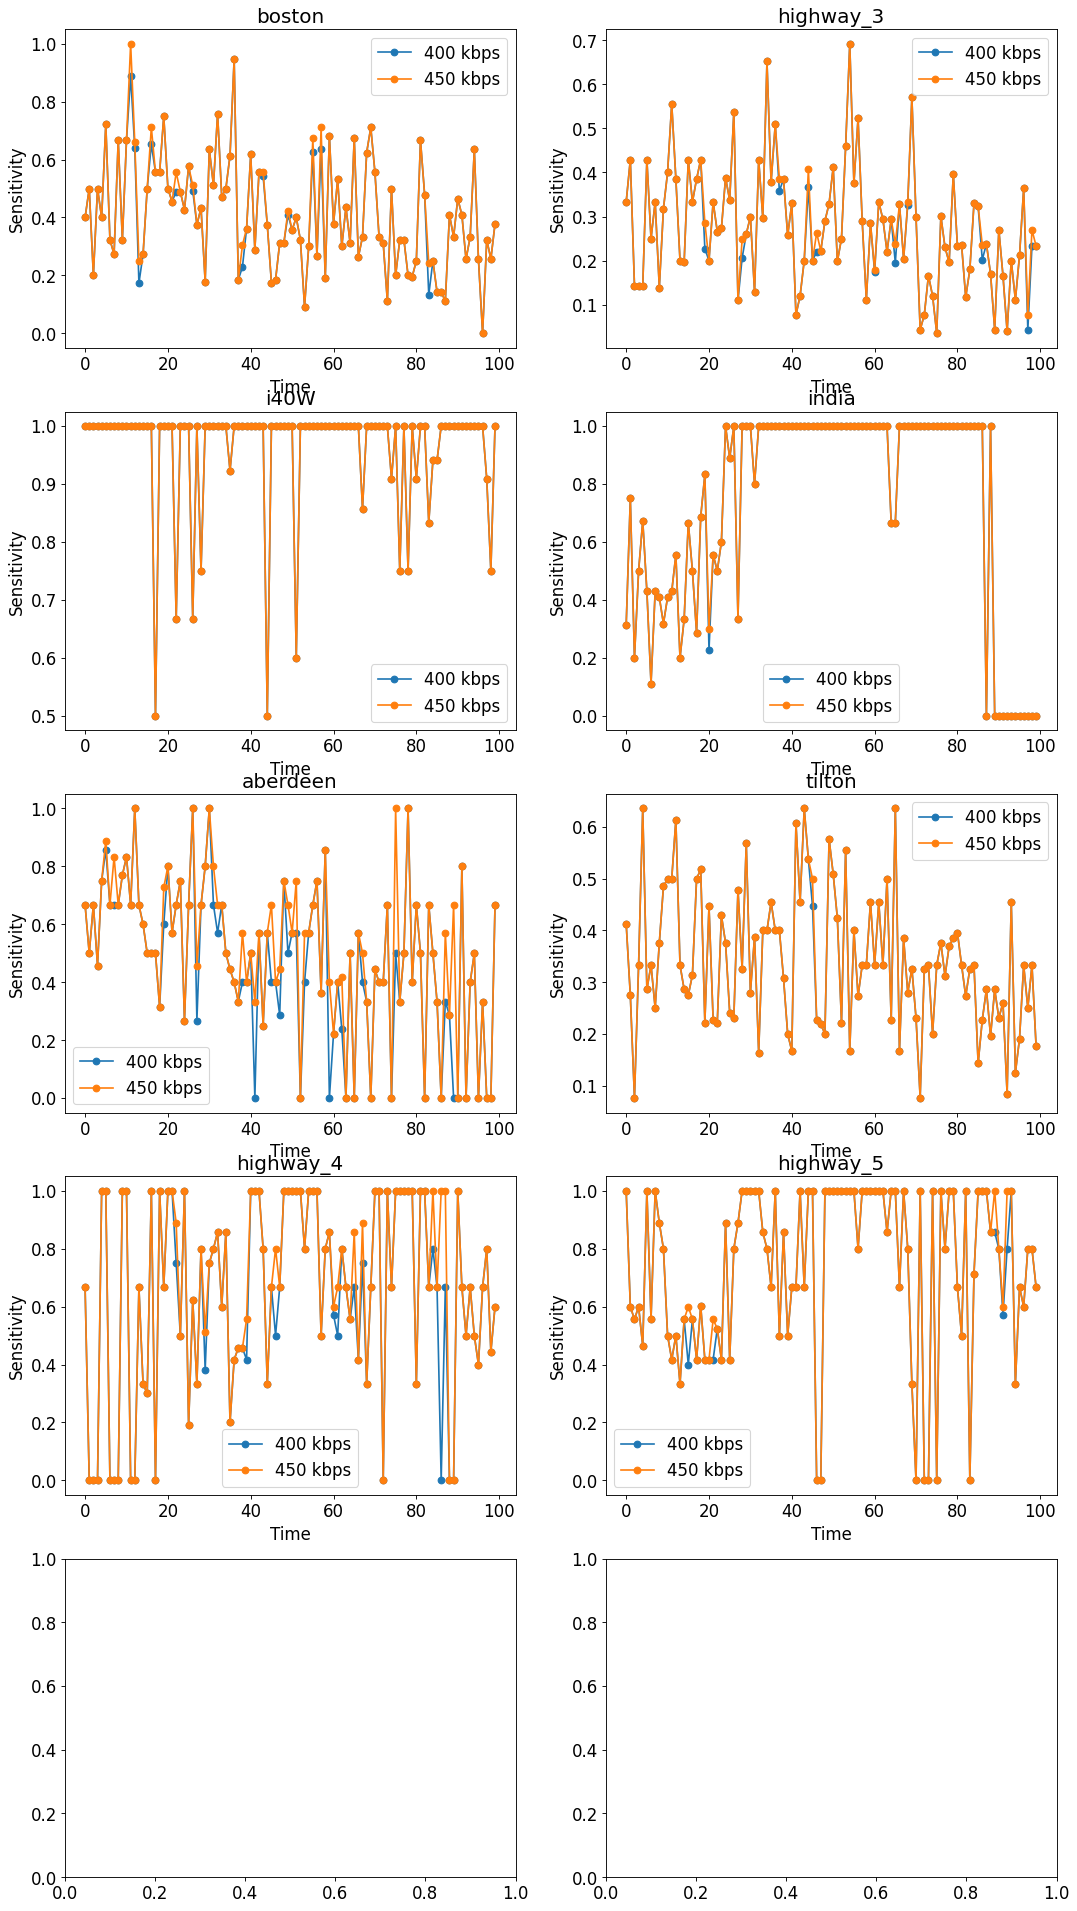

In [79]:
sensd = plotSensitivity([400, 450], 180, "new")

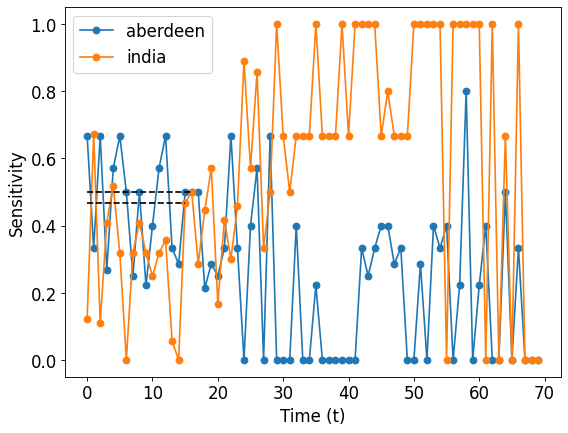

In [14]:
pos = 1
india = sensd[3][pos]
i40W = sensd[2][pos]
aberdeen = sensd[4][pos]
highway_4 = sensd[-2][pos]

plt.figure(figsize=(8,6), dpi=80)

plt.xlabel('Time (t)')
plt.ylabel('Sensitivity')
plt.rcParams.update({'font.size': 15})
x_axis = [i for i in range(0,35*2,1)]

# jakarta_line = plt.plot(x_axis, highway,
# 'o-',
# label = 'highway',)
# aberdeen_line = plt.plot(x_axis, aberdeen,
# 'o-',
# label = 'Aberdeen',)
i40W_line = plt.plot(x_axis, aberdeen[0:70],
'o-',
label = 'aberdeen',)
india_line = plt.plot(x_axis, india[0:70],
'o-',
label = 'india',)
indPos = 15
abPos = 16
plt.hlines(india[indPos], 0, indPos, "k", "dashed")
plt.hlines(aberdeen[abPos], 0, abPos, "k", "dashed")


# y-axis percentage
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ticklabel_format(style='plain', axis='x', )

plt.legend()

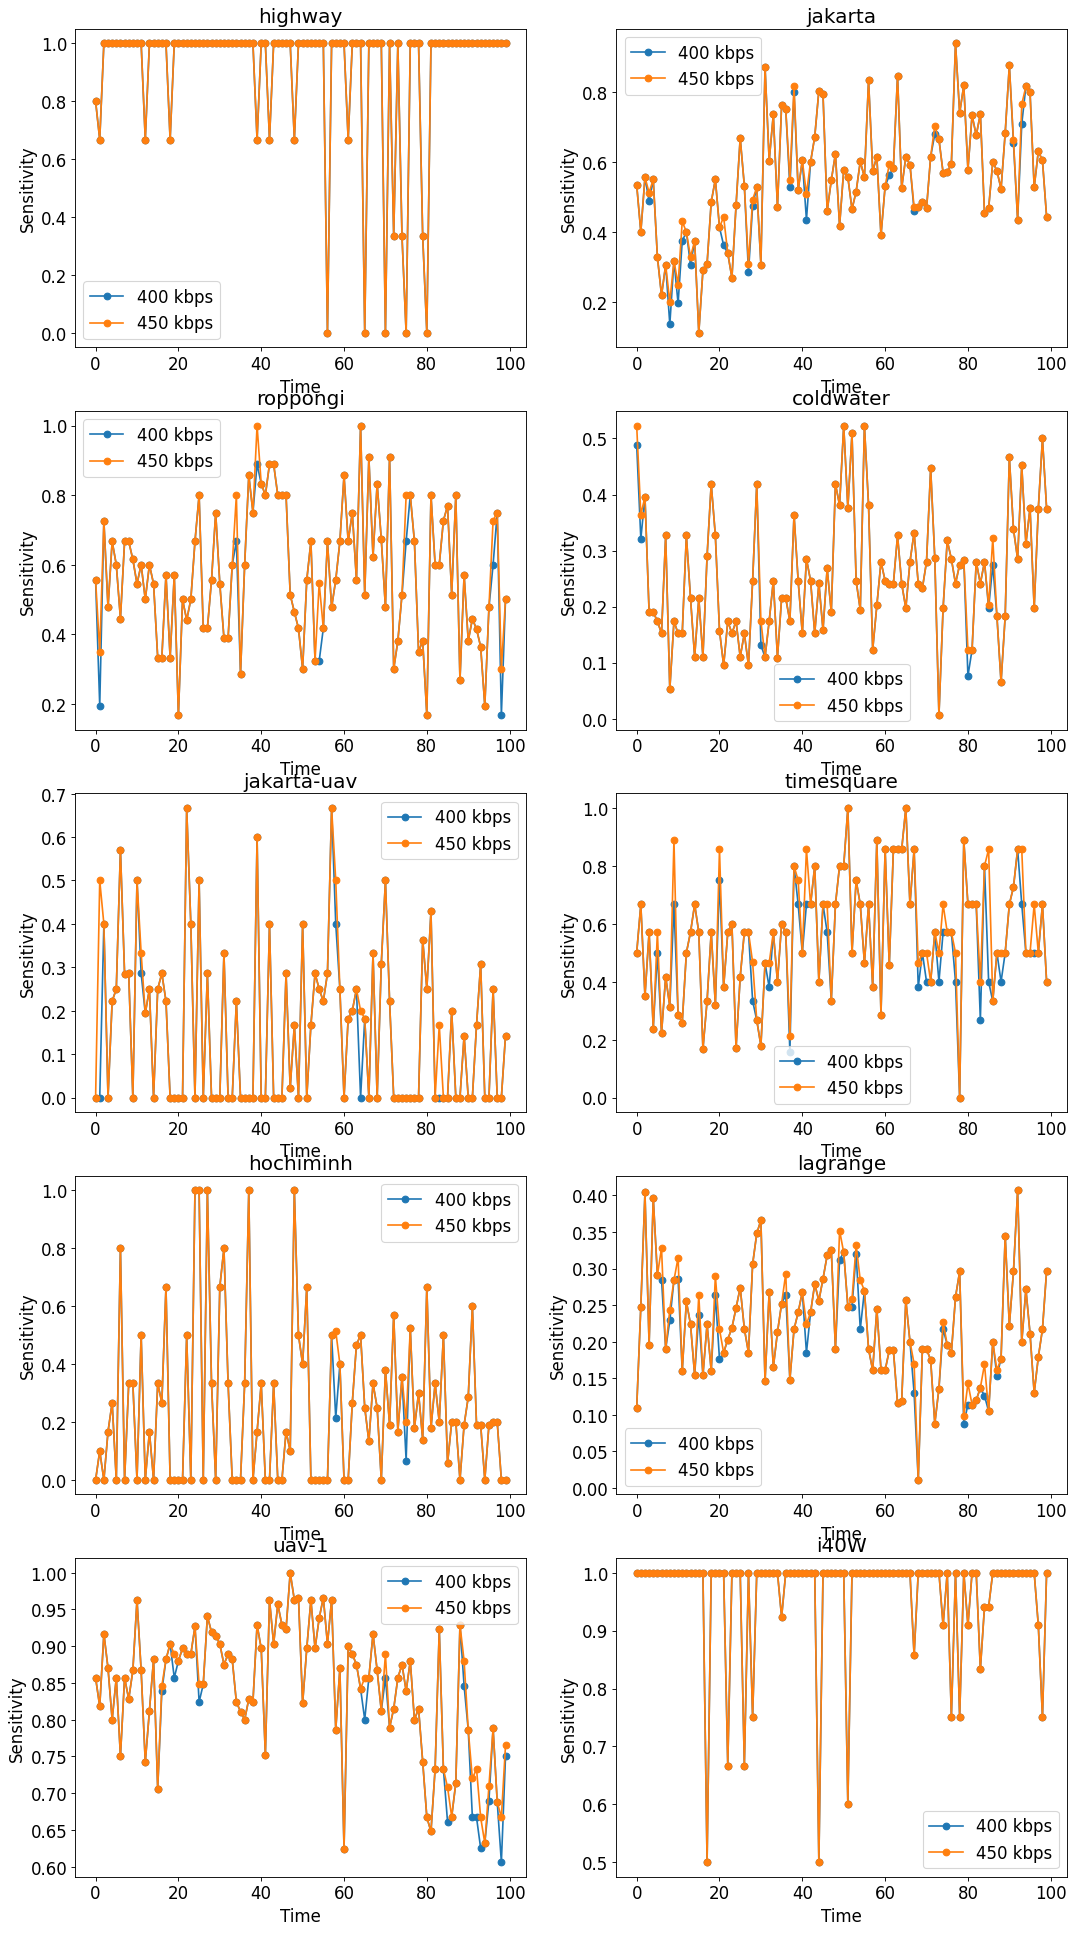

In [32]:
sensd_old = plotSensitivity([400, 450], 180, "old")

In [33]:
pos = 1
# jakarta = sensd[1][pos]
# i40W = sensd[-1][pos]
# highway = sensd[0][pos]
# uav1 = sensd[-2][pos]
# coldwater = sensd[3][pos]
timesquare=sensd_old[5][pos]
lagrange=sensd_old[7][pos]

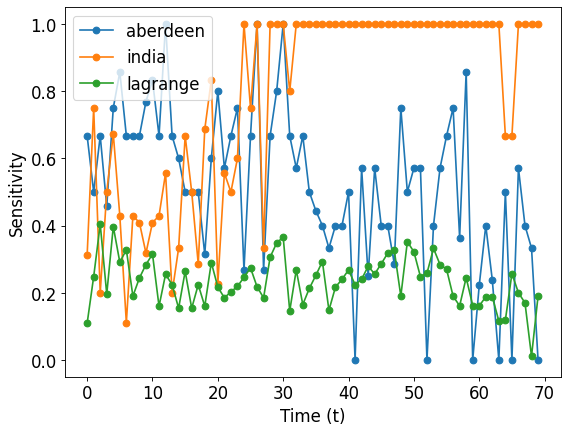

In [34]:
# pos = 1
# india = sensd[3][pos]
# i40W = sensd[2][pos]
# aberdeen = sensd[4][pos]
# highway_4 = sensd[-2][pos]

plt.figure(figsize=(8,6), dpi=80)

plt.xlabel('Time (t)')
plt.ylabel('Sensitivity')
plt.rcParams.update({'font.size': 15})
x_axis = [i for i in range(0,35*2,1)]

# jakarta_line = plt.plot(x_axis, highway,
# 'o-',
# label = 'highway',)
# aberdeen_line = plt.plot(x_axis, aberdeen,
# 'o-',
# label = 'Aberdeen',)
i40W_line = plt.plot(x_axis, aberdeen[0:70],
'o-',
label = 'aberdeen',)
india_line = plt.plot(x_axis, india[0:70],
'o-',
label = 'india',)
# lagrange_line = plt.plot(x_axis, timesquare[0:70],
# 'o-',
# label = 'timesquare',)
lagrange_line = plt.plot(x_axis, lagrange[0:70],
'o-',
label = 'lagrange',)

# y-axis percentage
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ticklabel_format(style='plain', axis='x', )

plt.legend(loc="best")

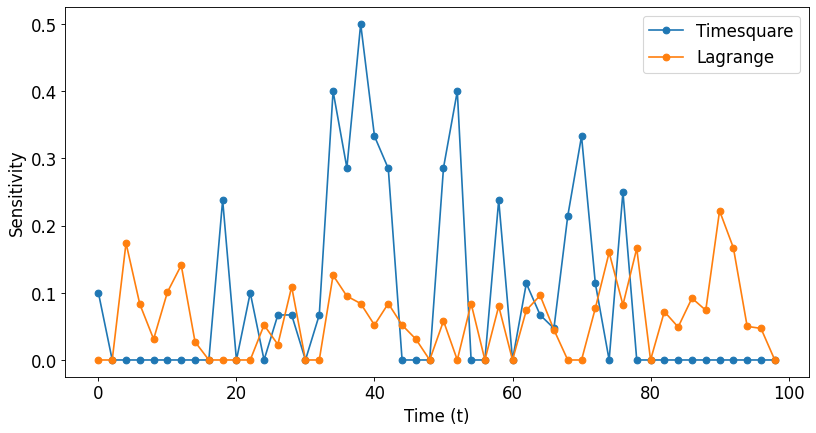

In [14]:
plt.figure(figsize=(12,6), dpi=80)

plt.xlabel('Time (t)')
plt.ylabel('Sensitivity')

x_axis = [i for i in range(0,len(jakarta)*2,2)]

# jakarta_line = plt.plot(x_axis, highway,
# 'o-',
# label = 'highway',)
i40W_line = plt.plot(x_axis, timesquare,
'o-',
label = 'Timesquare',)
# uav1_line = plt.plot(x_axis, uav1,
# 'o-',
# label = 'uav-1',)
uav1_line = plt.plot(x_axis, lagrange,
'o-',
label = 'Lagrange',)

# y-axis percentage
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ticklabel_format(style='plain', axis='x', )

plt.legend()